In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Exercises for Friday
***
# Exercise 1 : XGBoost models

Using the `load_diabetes` from sklearn, train, validate and test a XGBoost model. \
What are the hyperparameters you wanna validate ?

In [2]:
# Your code here

***
# Exercise 2 : K-Means

Using the `load_digits` dataset from sklearn, how many cluster you could use to find the right cluster ? 

Train and test a KMeans model on this dataset.

In [3]:
# Your code here
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [8]:
# Train a KMeans model on this dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [9]:
# Performances report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.00      0.00      0.00       182
           2       0.02      0.02      0.02       177
           3       0.00      0.00      0.00       183
           4       0.00      0.00      0.00       181
           5       0.00      0.00      0.00       182
           6       0.01      0.01      0.01       181
           7       0.00      0.00      0.00       179
           8       0.00      0.00      0.00       174
           9       0.01      0.01      0.01       180

    accuracy                           0.00      1797
   macro avg       0.00      0.00      0.00      1797
weighted avg       0.00      0.00      0.00      1797



In [24]:
# PCA transform
from sklearn.decomposition import PCA
pca = PCA(n_components = 10).fit(X)

In [ ]:
# Fit KMeans
from sklearn.pipeline import make_pipeline
kmeans = make_pipeline(StandardScaler(), KMeans(init=pca.components_, n_clusters = 10))
kmeans.fit(X)
y_pred = kmeans.predict(X)
# Performances report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       178
           1       0.79      0.55      0.65       182
           2       0.01      0.01      0.01       177
           3       0.00      0.00      0.00       183
           4       0.00      0.00      0.00       181
           5       0.00      0.00      0.00       182
           6       0.00      0.00      0.00       181
           7       0.00      0.00      0.00       179
           8       0.79      0.78      0.78       174
           9       0.39      0.81      0.53       180

    accuracy                           0.21      1797
   macro avg       0.20      0.21      0.20      1797
weighted avg       0.20      0.21      0.20      1797



What trick would you use to VISUALIZE your results ?

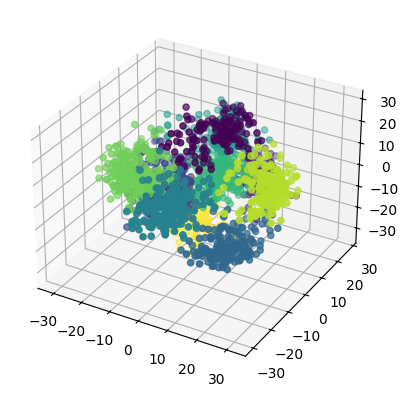

In [ ]:
# interactive 3D color plot

In [26]:
import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [37]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.accuracy_score,
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        # metrics.silhouette_score(
        #     data,
        #     estimator[-1].labels_,
        #     metric="euclidean",
        #     sample_size=300,
        # ),
        metrics.accuracy_score(labels, estimator[-1].labels_)
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.132s	69545	0.022	0.598	0.645	0.621	0.469	0.617
random   	0.102s	69735	0.114	0.681	0.723	0.701	0.574	0.698
PCA-based	0.016s	69513	0.007	0.600	0.647	0.622	0.468	0.618
__________________________________________________________________________________


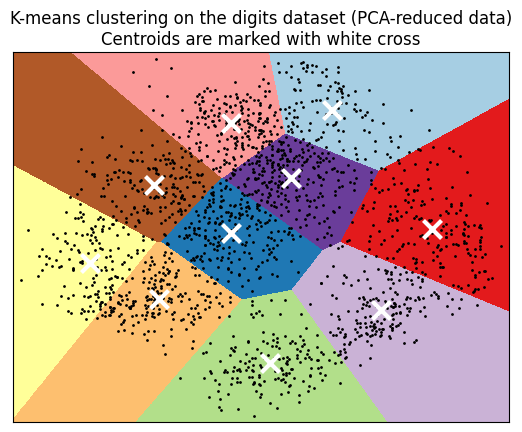

In [39]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

***
# Exercise 3 : Succeed with your project! 

In [3]:
# Your project here